# **Phylogenetics**

In 2022, the H5N1 HPAI Avian influenza strain, 2.3.4.4b, made its first known appearance in North America, likely introduced by migratory birds. Understanding the evolutionary relationships between different strains of H5N1 across the globe can provide insights into how the virus spreads, and how different strains are related to one another.

In this Notebook, we will carry out some important and necessary steps to be able to reconstruct a phylogenetic hypothesis about this pandemic pathogen. To do this, we will perform phylogenetic inference using the maximum likelihood method. This will involve:
* Alignment of genomic sequence data;
* Choose the best nucleotide substitution model;
* Generate a phylogenetic tree;
* Generate a time tree;
* Visulise the tree.



## Required programs or packages

* **MAFFT** for genome alignment (https://mafft.cbrc.jp/alignment/software/)

* **Seqkit** a toolkit for FASTA/Q file manipulation (https://bioinf.shenwei.me/seqkit)

* **IQ-TREE** for reconstruction of the maximum likelihood phylogenetic tree (http://www.iqtree.org/)

* **ggtree** an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data (https://github.com/YuLab-SMU/ggtree)

* **treetime** Maximum likelihood inference of time stamped phylogenies and ancestral reconstruction (https://github.com/neherlab/treetime)




## Other interesting programs


* **Figtree** a Java program to visualize phylogenetic trees (http://tree.bio.ed.ac.uk/software/figtree/).
* **auspice.us** allows interactive exploration of phylogenomic datasets by simply dragging & dropping them onto this page.
* **Clockor2** is a client-side web application for conducting root-to-tip regression



## Set up the analysis enviroment

In [27]:
!wget https://github.com/Wytamma/seqasia-phylo-env/releases/download/v1.0.1/seqasia-phylo-env-v1.0.1-linux-64.sh

--2025-12-15 03:11:00--  https://github.com/Wytamma/seqasia-phylo-env/releases/download/v1.0.1/seqasia-phylo-env-v1.0.1-linux-64.sh
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/1116526857/e5448e6e-66c7-41a6-9cc8-662efe3cb733?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-15T03%3A52%3A01Z&rscd=attachment%3B+filename%3Dseqasia-phylo-env-v1.0.1-linux-64.sh&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-15T02%3A51%3A45Z&ske=2025-12-15T03%3A52%3A01Z&sks=b&skv=2018-11-09&sig=u4g1ou5Vwnyo1b2Pik%2FIc8ApOEE8LzFapvDTjGAzOZU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTc3MTg1NywibmJmIjoxNzY

In [28]:
!chmod +x seqasia-phylo-env-v1.0.1-linux-64.sh

In [29]:
!./seqasia-phylo-env-v1.0.1-linux-64.sh

⏳ Extracting and installing 241 packages to /tmp/.tmpeiZRlM/cache...
[00:00:21] ########################################                             💫 Finished unpacking to /home/jovyan/phylo.


In [30]:
!/home/jovyan/phylo/env/bin/python -m ipykernel install \
  --user \
  --name phylo \
  --display-name "Python (phylo)"

Installed kernelspec phylo in /home/jovyan/.local/share/jupyter/kernels/phylo


In [98]:
%env PATH=./env/bin:/opt/conda/bin:/opt/conda/condabin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
%env CONDA_PREFIX=/home/jovyan/phylo/env

env: PATH=./env/bin:/opt/conda/bin:/opt/conda/condabin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
env: CONDA_PREFIX=/home/jovyan/phylo/env


# Change the kernal to Python (phylo)

Got to the Kernel manual and change the kernal to the Python (phylo) env we just set up.

(If you don't see the Kernel then we might need to restart the notebook)

Kernel → Change Kernel → Python (phylo)

## Downloading the dataset to be analyzed.

We will use a AIV dataset for this practical. This dataset was


In [30]:
!wget -O AIV_HA.fasta https://raw.githubusercontent.com/Wytamma/BINF90004/main/data/AIV_HA.fasta

--2025-12-15 03:33:26--  https://raw.githubusercontent.com/Wytamma/BINF90004/main/data/AIV_HA.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874671 (854K) [text/plain]
Saving to: ‘AIV_HA.fasta’

AIV_HA.fasta        100%[===================>] 854.17K  --.-KB/s    in 0.02s   

2025-12-15 03:33:26 (37.0 MB/s) - ‘AIV_HA.fasta’ saved [874671/874671]



## Fasta file format

The FASTA file format (`.fasta`, `.fa`) is a widely used text-based format for representing nucleotide or peptide sequences in bioinformatics. Each sequence in a FASTA file starts with a header line, beginning with a > character, followed by an identifier (such as a sequence name or accession number) and optionally additional descriptive information. The sequence data follows the header and consists of nucleotide bases (for DNA or RNA) or amino acids (for proteins) represented in a single-letter code. Although the sequence data can be split across multiple lines for readability, this is not required, and many bioinformatics tools can handle sequences on a single line.

In [31]:
!head AIV_HA.fasta

>A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06
AUGGAGAACAUAGUACUACUUCUUGCAAUAGUUAGCCUUGUUAAAAGUGAUCAGAUUUGC
AUUGGUUACCAUGCAAACAAUUCGACAGAGCAAGUUGACACGAUAAUGGAAAAGAACGUC
ACUGUUACACAUGCCCAAGACAUACUGGAAAAAACACACAACGGGAAGCUCUGUGAUCUA
AAUGGGGUGAAGCCUCUGAUUUUAAAGGAUUGUAGUGUAGCUGGAUGGCUCCUCGGAAAC
CCAAUGUGCGACGAAUUCAUCAGAGUGCCGGAAUGGUCCUACAUAGUGGAGCGGGCUAAC
CCAGCUAAUGACCUCUGUUACCCAGGGAGCCUCAAUGACUAUGAAGAACUGAAACACAUG
UUGAGCAGAAUAAAUCAUUUUGAGAAGAUUCUGAUCAUCCCCAAGAGUUCCUGGCCAAAU
CAUGAAACAUCACUAGGGGUGAGCGCAGCUUGUCCAUACCAGGGAGCGCCCUCCUUUUUC
AGAAAUGUGGUGUGGCUUAUCAAAAAGAACGAUGCAUACCCAACAAUAAAGAUAAGCUAC


In [32]:
# Number of sequences
# What is this command doing?
!grep '>' AIV_HA.fasta | wc -l

484


In [42]:
# Use seqkit to get stats
!seqkit stats --all AIV_HA.fasta

file          format  type  num_seqs  sum_len  min_len  avg_len  max_len     Q1     Q2     Q3  sum_gap    N50  N50_num  Q20(%)  Q30(%)  AvgQual  GC(%)  sum_n
AIV_HA.fasta  FASTA   DNA        483  828,326      688    1,715    1,776  1,704  1,704  1,751        0  1,704       15       0       0        0  42.07      3


In [43]:
# Convert to DNA and remove any gaps
!seqkit seq --rna2dna --remove-gaps  AIV_HA.fasta > AIV_HA.dna.fasta && cp AIV_HA.dna.fasta AIV_HA.fasta

[WARN] it's already DNA, no need to convert


In [46]:
!seqkit stats --all AIV_HA.dna.fasta

file              format  type  num_seqs  sum_len  min_len  avg_len  max_len     Q1     Q2     Q3  sum_gap    N50  N50_num  Q20(%)  Q30(%)  AvgQual  GC(%)  sum_n
AIV_HA.dna.fasta  FASTA   DNA        483  828,326      688    1,715    1,776  1,704  1,704  1,751        0  1,704       15       0       0        0  42.07      3


### Filter low quality sequences

We will filter out any sequence with > %10 ambiguous nucleotides (W, S, K, M, Y, R, V, H, D, B, or N).


Q: How can we modify this code to also print any seq with an ambiguous base?

In [38]:
from collections import Counter

with open("sequence_to_filter.txt", "w") as f:
  for header, sequence in sequences.items():
      non_ambiguous_count = sum(sequence.count(char) for char in "ACTG")
      count = len(sequence) - non_ambiguous_count # ambiguous_count
      # Sequences with > 10% ambiguous nucleotides
      if count > 1:
          print(f"{header}: {count} ambiguous nucleotides")
      if count / len(sequence) > 0.1:
          print(f"Removing {header}: {count} ambiguous nucleotides")
          f.write(header + "\n")

# Filter selected sequences
!seqkit grep -v -f sequence_to_filter.txt AIV_HA.fasta > AIV_HA.filtered.fasta && cp AIV_HA.filtered.fasta AIV_HA.fasta

A/Est/Parnu/eagle/TA21-11864-1/2021|2.3.4.4b|2021-05-16: 2 ambiguous nucleotides
A/chicken/Germany-BB/AI06242/2021|2.3.4.4b|2021-11-02: 2 ambiguous nucleotides
A/great_skua/Scotland/042505/2021|2.3.4.4b|2021-07-22: 2 ambiguous nucleotides
A/herring_gull/Germany-SH/AI06141/2021|2.3.4.4b|2021-10-21: 2 ambiguous nucleotides
A/snow_goose/Kansas/W22-199A/2022|2.3.4.4b|2022-03-14: 509 ambiguous nucleotides
Removing A/snow_goose/Kansas/W22-199A/2022|2.3.4.4b|2022-03-14: 509 ambiguous nucleotides
[INFO] 1 patterns loaded from file


In [40]:
!seqkit stats AIV_HA.filtered.fasta

file                   format  type  num_seqs  sum_len  min_len  avg_len  max_len
AIV_HA.filtered.fasta  FASTA   DNA        483  828,326      688    1,715    1,776


## Alignment

Multiple Sequence Alignment (MSA) is a computational technique used to align three or more biological sequences, typically DNA, RNA, or protein sequences. The goal of MSA is to identify regions of similarity that may indicate functional, structural, or evolutionary relationships among the sequences. MSA is a fundamental method in bioinformatics and is widely used in various applications, such as phylogenetics, protein structure prediction, and functional annotation.

#### MAFFT (Multiple Alignment using Fast Fourier Transform)

We will use MAFFT for sequence alignment. It is quite fast and accurate.

There are many options for aligning sequences using MAFFT. --auto is a good option where the program itself chooses the most efficient algorithm (good balance between speed and accuracy). Alignment can take days for datasets with very long sequences if you have chosen the most accurate algorithm. If you are aligning short sequences, such as a less conserved gene, you can use more computationally expensive but also more accurate options. MAFFT has good examples of what to use and when to use it on its website: https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html.

* Tip: When you are working with alignments containing hundreds or thousands of sequences from the same virus, mafft can be used to quickly align new sequences to an existing alignment using mafft --add. This parameter and its variations allow aligning complete genomes as well as fragments ([see documentation here](https://mafft.cbrc.jp/alignment/software/addsequences.html))

In [47]:
!mafft --help

------------------------------------------------------------------------------
  MAFFT v7.526 (2024/Apr/26)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

In [48]:
!mafft --thread -1 --auto AIV_HA.fasta > AIV_HA.aligned.fasta && cp AIV_HA.aligned.fasta AIV_HA.aln

OS = linux
The number of physical cores =  224
nthread = 224
nthreadpair = 224
nthreadtb = 16
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 18 ambiguous characters.
  401 / 483 (thread   75)
done.

Constructing a UPGMA tree (efffree=0) ... 
  480 / 483
done.

Progressive alignment 1/2... 
STEP   482 / 482 (thread   12)
done.

Making a distance matrix from msa.. 
  400 / 483 (thread   18)
done.

Constructing a UPGMA tree (efffree=1) ... 
  480 / 483
done.

Progressive alignment 2/2... 
STEP   482 / 482 (thread    1)
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
16 thread(s)

distout=h
generating a scoring matrix for nucleotide (dist=200) ... done
  400 / 483 (thread   61)dndpre (nuc) Version 7.526
alg=X, model=DNA200 (2), 1.53 (4.59), 0.37 (1.11), noshift, amax=0.0
224 thread(s)

minimumweight = 0.0

#### MAFFT OUTPUT

### Key Sections:

- **Threads**: Alignment was run on a single thread (`nthread = 1`).
- **Scoring Matrix**: A matrix was generated for nucleotide sequences with a gap opening penalty of `-1.53`.
- **Distance Matrix & UPGMA Tree**: Calculated pairwise distances and constructed a guide tree for alignment.
- **Progressive Alignment**: Performed in two steps, refining the alignment progressively.
- **Iterative Refinement**: Segments were refined until they converged, indicating a successful alignment.

### Strategy:
- **FFT-NS-i**: Fast alignment with iterative refinement (2 iterations).

In [49]:
!head AIV_HA.aln

>A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06
----------------------------atggagaacatagtactacttcttgcaatagt
tagccttgttaaaagtgatcagatttgcattggttaccatgcaaacaattcgacagagca
agttgacacgataatggaaaagaacgtcactgttacacatgcccaagacatactggaaaa
aacacacaacgggaagctctgtgatctaaatggggtgaagcctctgattttaaaggattg
tagtgtagctggatggctcctcggaaacccaatgtgcgacgaattcatcagagtgccgga
atggtcctacatagtggagcgggctaacccagctaatgacctctgttacccagggagcct
caatgactatgaagaactgaaacacatgttgagcagaataaatcattttgagaagattct
gatcatccccaagagttcctggccaaatcatgaaacatcactaggggtgagcg-----ca
gcttgtccataccagggagcgccctcctttttcagaaatgtggtgtggcttatcaaaaag


In [50]:
!seqkit stats AIV_HA.aln

file        format  type  num_seqs    sum_len  min_len  avg_len  max_len
AIV_HA.aln  FASTA   DNA        483  1,021,062    2,114    2,114    2,114


### Inspecting the alignment

The complete sequence of a hemagglutinin (HA) gene of a recent human influenza A strain, A/Victoria/3/75, is 1768 nucleotides long and contains the information for 567 amino acids. Clearly there is something wrong with our a alignment at is it 2114 nucleotides long. We will inspect the alignment to see if we can tell what's wrong.

In [51]:
#Calling help to know more about the parameters
!alv -h

usage: alv [-h] [--version] [-ai ALIGNMENT_INDEX]
           [-f {guess,fasta,clustal,nexus,phylip,stockholm}]
           [-t {aa,dna,rna,codon,guess}] [-g]
           [-c {clustal,taylor,hydrophobicity}]
           [--code {1,2,3,4,5,6,9,10,11,12,13,14,16,21,22,23,24,25,26,27,28,29,30,31}]
           [-d] [-lc] [-w WIDTH] [-k] [-l] [-i] [-j] [--cite] [--method]
           [-r N] [-s {infile,alpha}] [-si ACCESSION] [-so ACCESSIONS]
           [-sm ACCESSION_PATTERN] [--majority] [--no-indels]
           [--only-variable] [--only-variable-excluding-indels] [-as INT INT]
           [-aa N]
           [infile]

positional arguments:
  infile                The infile is the path to a file, or '-' if reading
                        from stdin.

options:
  -h, --help            show this help message and exit
  --version             show program's version number and exit
  -ai, --alignment-index ALIGNMENT_INDEX
                        If reading file with many alignments, choose which one
 

### Filter and trim the aligment

Trim the ends of the aligment (error prone) using the first sequence as a guide.

In [60]:
!seqkit head -n 1 AIV_HA.aln | seqkit locate -Pdip '(N)' | head -n2 # find the first base i.e. not a gap
!seqkit head -n 1 AIV_HA.aln | seqkit locate -Pdip '(N)' | tail -n1 # find the last base i.e. not a gap

seqID	patternName	pattern	strand	start	end	matched
A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06	(N)	(N)	+	29	29	a
A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06	(N)	(N)	+	2016	2016	g


In [61]:
# Python magic to get ends of the aligment
start, *_ = !seqkit head -n 1 AIV_HA.aln | seqkit locate -Pdip '(N)' | sed -n '2p' | awk '{print $5}'
end, *_ = !seqkit head -n 1 AIV_HA.aln | seqkit locate -Pdip '(N)' | sed -n '$p' | awk '{print $5}'

# Trim the aligment
!seqkit -w 0 subseq -r $start:$end AIV_HA.aln > AIV_HA.trimmed.aln && cp AIV_HA.trimmed.aln AIV_HA.aln

[INFO] create or read FASTA index ...
[INFO] create FASTA index for AIV_HA.aln
[INFO]   483 records loaded from AIV_HA.aln.seqkit.fai


To filter poorly aligned sequences we can visually inspect the aligment to find poorly aligned sequences.

Alternatively use the first sequence as a reference and remove any sequences that are significantly different. The code below does this use [Biopython](https://biopython.org/).

In [63]:
from Bio import AlignIO
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

# Load the MSA file
alignment = AlignIO.read("AIV_HA.aln", "fasta")

# Select the first sequence as the reference
reference_seq = alignment[0].seq

# Define a similarity threshold (e.g., 0.9 = 90%)
threshold = 0.6

def calculate_similarity(seq1, seq2):
    """Calculate the similarity score between two sequences."""
    matches = sum(res1 == res2 for res1, res2 in zip(seq1, seq2))
    return matches / len(seq1)

# Filter sequences
filtered_sequences = []
for record in alignment:
    similarity = calculate_similarity(reference_seq, record.seq)
    if similarity >= threshold:
        filtered_sequences.append(record)
    else:
        print(f"Removing sequence {record.id} with similarity {similarity:.2f}")

# Save the filtered sequences to a new FASTA file
with open("AIV_HA.clean.aln", "w") as output_handle:
    SeqIO.write(filtered_sequences, output_handle, "fasta")

Removing sequence A/buzzard/Germany-NI/AI04429/2021|2.3.4.4b|2021-04-28 with similarity 0.47
Removing sequence A/royal_tern/Florida/W22-245A/2022|2.3.4.4b|2022-03-02 with similarity 0.33
Removing sequence A/teal/Samara/Bolshechernigovsky/2021|2.3.4.4b|2021-10-13 with similarity 0.49
Removing sequence A/white-tailed_sea_eagle/Germany-MV/2022AI04824/2021|2.3.4.4b|2021-11-26 with similarity 0.47


In [64]:
!seqkit stats AIV_HA.clean.aln

file              format  type  num_seqs  sum_len  min_len  avg_len  max_len
AIV_HA.clean.aln  FASTA   DNA        479  952,252    1,988    1,988    1,988


### Realign

As we have removed several samples we should realign our sequences.

In [65]:
!mafft --thread -1 --auto AIV_HA.clean.aln > AIV_HA.realigned.aln && cp AIV_HA.realigned.aln AIV_HA.aln

OS = linux
The number of physical cores =  224
nthread = 224
nthreadpair = 224
nthreadtb = 16
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 16 ambiguous characters.
  401 / 479 (thread   67)
done.

Constructing a UPGMA tree (efffree=0) ... 
  470 / 479
done.

Progressive alignment 1/2... 
STEP   478 / 478 (thread   13)
done.

Making a distance matrix from msa.. 
  400 / 479 (thread   40)
done.

Constructing a UPGMA tree (efffree=1) ... 
  470 / 479
done.

Progressive alignment 2/2... 
STEP   478 / 478 (thread    0)
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
16 thread(s)

distout=h
generating a scoring matrix for nucleotide (dist=200) ... done
  400 / 479 (thread   84)dndpre (nuc) Version 7.526
alg=X, model=DNA200 (2), 1.53 (4.59), 0.37 (1.11), noshift, amax=0.0
224 thread(s)

minimumweight = 0.0

In [66]:
!seqkit stats --all AIV_HA.aln

file        format  type  num_seqs  sum_len  min_len  avg_len  max_len     Q1     Q2     Q3  sum_gap    N50  N50_num  Q20(%)  Q30(%)  AvgQual  GC(%)  sum_n
AIV_HA.aln  FASTA   DNA        479  816,216    1,704    1,704    1,704  1,704  1,704  1,704      177  1,704        1       0       0        0  42.11      3


## Phylogenetic Inference

IQ-TREE allows you to perform maximum likelihood phylogenetic analyzes of hundreds or thousands of sequences. With it you can:

* **Estimate the evolutionary model:** has an integrated program called ModeFinder, which quickly evaluates a large number of nucleotide substitution models and chooses the most suitable one for the data set in question.
* **Infer maximum likelihood tree:** estimates and evaluates the robustness of the best tree using approaches such as bootstrap, ultra-fast bootstrap or probabilistic evaluations.

The program can also be run on online servers:
* W-IQ-TREE Server – http://iqtree.cibiv.univie.ac.at/
* Cyberinfrastructure for Phylogenetic Research (CIPRES) – https://www.phylo.org/
* HIV Sequence Database – https://www.hiv.lanl.gov/content/sequence/IQTREE/iqtree.html

In [70]:
!iqtree -h

IQ-TREE version 3.0.1 for Linux x86 64-bit built Jul  9 2025
Developed by Bui Quang Minh, Thomas Wong, Nhan Ly-Trong, Huaiyan Ren
Contributed by Lam-Tung Nguyen, Dominik Schrempf, Chris Bielow,
Olga Chernomor, Michael Woodhams, Diep Thi Hoang, Heiko Schmidt

Usage: iqtree [-s ALIGNMENT] [-p PARTITION] [-m MODEL] [-t TREE] ...

GENERAL OPTIONS:
  -h, --help           Print (more) help usages
  -s FILE[,...,FILE]   PHYLIP/FASTA/NEXUS/CLUSTAL/MSF alignment file(s)
  -s DIR               Directory of alignment files
  --seqtype STRING     BIN, DNA, AA, NT2AA, CODON, MORPH (default: auto-detect)
  -t FILE|PARS|RAND    Starting tree (default: 99 parsimony and BIONJ)
  -o TAX[,...,TAX]     Outgroup taxon (list) for writing .treefile
  --prefix STRING      Prefix for all output files (default: aln/partition)
  --seed NUM           Random seed number, normally used for debugging purpose
  --safe               Safe likelihood kernel to avoid numerical underflow
  --mem NUM[G|M|%]     Maximal RAM

In [74]:
!iqtree -s AIV_HA.aln -m TEST -B 1000 -T 6

#Parameters
# -s: alignment file name
# -m: model selection strategy. If no option is specified
# -B: method to assess clade support, number of replicas for ultra-fast bootstrap - results can be retrieved in .treefile and .contree
# -T: Use 6 cpus to build the tree. A good practice is to use -T AUTO to determine the best number of cores


******************************************************
CHECKPOINT: Resuming analysis from AIV_HA.aln.ckp.gz

IQ-TREE version 3.0.1 for Linux x86 64-bit built Jul  9 2025
Developed by Bui Quang Minh, Thomas Wong, Nhan Ly-Trong, Huaiyan Ren
Contributed by Lam-Tung Nguyen, Dominik Schrempf, Chris Bielow,
Olga Chernomor, Michael Woodhams, Diep Thi Hoang, Heiko Schmidt

Host:    jupyter-wytamma-2ewirth-40me-2ecom (AVX512, FMA3, 3022 GB RAM)
Command: iqtree -s AIV_HA.aln -m TEST -B 1000 -T 8
Seed:    373567 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Mon Dec 15 03:58:23 2025
Kernel:  AVX+FMA - 8 threads (448 CPU cores detected)

Reading alignment file AIV_HA.aln ... Fasta format detected
Reading fasta file: done in 0.00930215 secs using 86.41% CPU
Alignment most likely contains DNA/RNA sequences
Constructing alignment: done in 0.00461686 secs using 772% CPU
Alignment has 479 sequences with 1704 columns, 341 distinct patterns
185 parsimony-informative, 155 singleton si

When the process is complete, output files will be found in the folder, including:

* **AIV_HA.aln.treefile:** the ML tree in NEWICK format, which can be viewed by any tree visualization program that supports the NEWICK format
* **AIV_HA.aln.contree:** the consensus ML tree obtained by fastbootstrap in NEWICK format, which can be viewed by any supported tree visualization program.
* **AIV_HA.aln.iqtree:** the main analysis report file. It also contains a textual representation of the final tree
* **AIV_HA.aln.log:** log file of the entire execution (the same as what is displayed on the screen).

Q: What DNA model was selected for by ModelFinder?

In [75]:
#Viewing trees in newick format
!cat AIV_HA.aln.iqtree

IQ-TREE 3.0.1 built Jul  9 2025

Input file name: AIV_HA.aln
Type of analysis: ModelFinder + tree reconstruction + ultrafast bootstrap (1000 replicates)
Random seed number: 373567

REFERENCES
----------

To cite IQ-TREE 3 please use:

Thomas K.F. Wong, Nhan Ly-Trong, Huaiyan Ren, Hector Banos, Andrew J. Roger,
Edward Susko, Chris Bielow, Nicola De Maio, Nick Goldman, Matthew W. Hahn,
Gavin Huttley, Robert Lanfear, Bui Quang Minh (2025)
IQ-TREE 3: Phylogenomic Inference Software using Complex Evolutionary Models.
Submitted.

Please also cite the following paper(s) for the feature(s) that you used:

To cite ModelFinder please use: 

Subha Kalyaanamoorthy, Bui Quang Minh, Thomas KF Wong, Arndt von Haeseler,
and Lars S Jermiin (2017) ModelFinder: Fast model selection for
accurate phylogenetic estimates. Nature Methods, 14:587–589.
https://doi.org/10.1038/nmeth.4285

Since you used ultrafast bootstrap (UFBoot) please also cite: 

Diep Thi Hoang, Olga Chernomor, Arndt von Haeseler, Bui Quang

In [76]:
#Viewing trees in newick format
!head AIV_HA.aln.treefile

(A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06:0.0017730064,(((((((((((((((((((((((((((((((((A/American_Black_Duck/Connecticut/USDA-005313-006/2022|2.3.4.4b|2022-02-16:0.0005896822,A/American_Black_Duck/Connecticut/USDA-005313-007/2022|2.3.4.4b|2022-02-16:0.0005897548)64:0.0000021526,A/American_Black_Duck/Connecticut/USDA-005313-008/2022|2.3.4.4b|2022-02-16:0.0011795816)100:0.0005893381,(A/Sanderling/Massachusetts/USDA-007696-001/2022|2.3.4.4b|2022-03-01:0.0000010000,A/sanderling/MA/22HP00124/2022|2.3.4.4b|2022-03-01:0.0000010000)100:0.0011798547)14:0.0000010000,A/American_Crow/NB/FAV-0117-1/2022|2.3.4.4b|2022-02-12:0.0005892609)17:0.0000021498,(((A/American_Crow/NB/FAV-0117-4/2022|2.3.4.4b|2022-02-24:0.0000000000,A/Sanderling/New_York/USDA-005646-001/2022|2.3.4.4b|2022-02-21:0.0000000000):0.0000000000,A/American_Crow/NB/FAV-0131-1/2022|2.3.4.4b|2022-02-15:0.0000000000):0.0000000000,A/American_Crow/NB/FAV-0118-3/2022|2.3.4.4b|2022-02-23:0.0000000000):0.0000

## Root to tip regression

We can download our tree and use https://clockor2.github.io to create a root-to-tip regression.

Dateformat = YYYY-MM-DD  
Delimiter = |  
Date Location = -1

It looks like `A/glaucous_gull/USA/22-023553-001/1905|2.3.4.4b|1905-07-14` has an incorrect date. Looking on NCBI we can find the correct year `2022` in the metadata (https://www.ncbi.nlm.nih.gov/nuccore/PP801670.1). Let's fix that date with `sed`.

`sed` (stream editor) is a Unix command-line utility used for parsing and transforming text streams or files. It processes text line-by-line, applying operations such as searching, replacing, deleting, inserting, or modifying text. sed is non-interactive, meaning it can automatically edit text without manual intervention, making it efficient for batch processing. The most common usage of sed involves substitution (s/old/new/), but it supports more complex operations using regular expressions. It's often used in shell scripts for automated text processing, such as modifying configuration files or log data on-the-fly.

![image](https://raw.githubusercontent.com/Wytamma/BINF90004/refs/heads/main/data/clockor2.png)

In [77]:
!sed -h

sed: invalid option -- 'h'
Usage: sed [OPTION]... {script-only-if-no-other-script} [input-file]...

  -n, --quiet, --silent
                 suppress automatic printing of pattern space
      --debug
                 annotate program execution
  -e script, --expression=script
                 add the script to the commands to be executed
  -f script-file, --file=script-file
                 add the contents of script-file to the commands to be executed
  --follow-symlinks
                 follow symlinks when processing in place
  -i[SUFFIX], --in-place[=SUFFIX]
                 edit files in place (makes backup if SUFFIX supplied)
  -l N, --line-length=N
                 specify the desired line-wrap length for the `l' command
  --posix
                 disable all GNU extensions.
  -E, -r, --regexp-extended
                 use extended regular expressions in the script
                 (for portability use POSIX -E).
  -s, --separate
                 consider files as separate rathe

In [78]:
!sed 's/1905-07-14/2022-02-14/g' AIV_HA.aln > AIV_HA.date.fixed.aln && cp AIV_HA.date.fixed.aln AIV_HA.aln
!sed 's/1905-07-14/2022-02-14/g' AIV_HA.aln.treefile > AIV_HA.date.fixed.treefile && cp AIV_HA.date.fixed.treefile AIV_HA.aln.treefile

## Creating a Time Tree (Chronogram)

We can use [TreeTime](https://treetime.readthedocs.io/en/latest/) to create a Time Tree.

TreeTime provides routines for ancestral sequence reconstruction and inference of molecular-clock phylogenies, i.e., a tree where all branches are scaled such that the positions of terminal nodes correspond to their sampling times and internal nodes are placed at the most likely time of divergence.

To optimize the likelihood of time-scaled phylogenies, TreeTime uses an iterative approach that first optimizes branch lengths of the tree given the sequence data and date constraints, and then optimizes coalescent tree priors, relaxed clock parameters, or resolves polytomies. This cycle is repeated a few times.

To run treetime we need a csv file that links tip labels to dates. We can generate this file from the tip labels.

In [79]:
with open("AIV_HA.metadata", "w") as f:
  f.write("name,date\n")
  for line in open("AIV_HA.aln"):
    if not line.startswith(">"):
      continue
    header = line.strip()[1:]
    f.write(f"{header},{header.split('|')[-1]}\n")

In [80]:
!treetime --tree AIV_HA.aln.treefile --dates AIV_HA.metadata --aln AIV_HA.aln --outdir timetree

/home/jovyan/phylo/env/lib/python3.14/site-packages/treetime/merger_models.py:189: SyntaxWarning: "\k" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\k"? A raw string is also an option.
  in the Kingman model this is: :math:`\kappa(t) = (k(t)-1)/(2Tc(t))`
/home/jovyan/phylo/env/lib/python3.14/site-packages/treetime/merger_models.py:199: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  in the Kingman model this is: :math:`\lambda(t) = k(t)(k(t)-1)/(2Tc(t))`
/home/jovyan/phylo/env/lib/python3.14/site-packages/treetime/merger_models.py:214: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  :math:`-log(\lambda(t_n+ \\tau)^{(m-1)/m}) + \int_{t_n}^{t_n+ \\tau} \kappa(t) dt`, where m is the multiplicity

Attempting to parse dates...
	Using column 'name' 

## Opening a few of the output files. There are visulisation as well as

tree as
	 timetree/timetree.pdf

--- root-to-tip plot saved to  
	timetree/root_to_tip_regression.pdf

--- alignment including ancestral nodes saved as  
	 timetree/ancestral_sequences.fasta

--- saved divergence times in
	 timetree/dates.tsv

--- tree saved in nexus format as  
	 timetree/timetree.nexus

--- tree saved in auspice json format as  
	 timetree/auspice_tree.json

--- divergence tree saved in nexus format as  
	 timetree/divergence_tree.nexus

--- saved detected outliers as timetree/outliers.tsv

Q: what is the TMRCA? Is it what you expect?

In [82]:
!head timetree/dates.tsv

#node	date	numeric date
NODE_0000002	2020-11-23	2020.894768
NODE_0000379	2020-11-23	2020.894768
NODE_0000381	2021-05-14	2021.365916
A/goose/Netherlands/22000221-001/2022|2.3.4.4b|2022-01-04	2022-01-04	2022.009589
NODE_0000382	2021-09-19	2021.715636
A/chicken/Tyumen/47-79V/2021|2.3.4.4b|2021-10-12	2021-10-12	2021.779452
NODE_0000383	2021-10-16	2021.791218
A/chicken/Tyumen/81-97V/2021|2.3.4.4b|2021-10-30	2021-10-30	2021.828767
A/turkey/Tyumen/81-96V/2021|2.3.4.4b|2021-10-30	2021-10-30	2021.828767


## Tree visuslsation

Here we will use the fantastic tree visulisation library `ggtree` to display our tree. To do this we need to use the R programming language.

In [83]:
%load_ext rpy2.ipython

In [84]:
%%R
# Install required R packages

if (!requireNamespace("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
    }
if (system.file(package = "ggtree") == '') {
        BiocManager::install("ggtree",quiet = TRUE)
    }
if (system.file(package = "treeio") == '') {
        BiocManager::install("treeio",quiet = TRUE)
    }

install.packages("ggnewscale")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]                   2: Australia (Canberra) [https]   
 3: Australia (Melbourne 1) [https]   4: Australia (Melbourne 2) [https]
 5: Austria (Wien) [https]            6: Belgium (Brussels) [https]     
 7: Brazil (PR) [https]               8: Brazil (SP 1) [https]          
 9: Brazil (SP 2) [https]            10: Bulgaria [https]               
11: Canada (MB) [https]              12: Canada (ON 1) [https]          
13: Canada (ON 2) [https]            14: Chile (Santiago) [https]       
15: China (Beijing 1) [https]        16: China (Beijing 2) [https]      
17: China (Beijing 3) [https]        18: China (Hefei) [https]          
19: China (Hong Kong) [https]        20: China (Lanzhou) [https]        
21: China (Nanjing) [https]          22: China (Shanghai 2) [https]     
23: China (Shenzhen) [https]         24: China (Wuhan) [https]          
25: Colombia (Cali) [https]          26: C

Selection:  1


* installing *source* package ‘BiocManager’ ...
** package ‘BiocManager’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (BiocManager)
* installing *source* package ‘ggnewscale’ ...
** package ‘ggnewscale’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed p

trying URL 'https://cloud.r-project.org/src/contrib/BiocManager_1.30.27.tar.gz'
Content type 'application/x-gzip' length 752490 bytes (734 KB)
downloaded 734 KB


The downloaded source packages are in
	‘/tmp/RtmpexVfaD/downloaded_packages’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
trying URL 'https://cloud.r-project.org/src/contrib/ggnewscale_0.5.2.tar.gz'
Content type 'application/x-gzip' length 415315 bytes (405 KB)
downloaded 405 KB


The downloaded source packages are in
	‘/tmp/RtmpexVfaD/downloaded_packages’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Guangchuang Yu. Using ggtree to visualize data on tree-like structures.
Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
treeio v1.30.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolution. 2020, 37(2):599-603.
doi: 10.1093/molbev/msz240
In addition: Warning messages:
1: `aes_()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`
ℹ The deprecated feature was likely used in the ggtree package.
  Please report the issue at <https://github.com/YuLab-SMU/ggtree/issues>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning

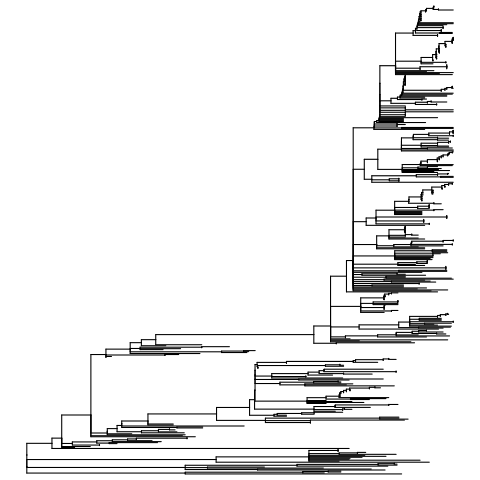

In [85]:
%%R
library(ggtree)
library(treeio)

tree <- read.nexus("./timetree/timetree.nexus")
ggtree(tree)

### What was the date of the introduction into North America?

Use ggtree to visualise the Time to Most Recent Common Ancestor (TMRCA) of the North American clade.

In [92]:
# Load location mapping file (North America or Other)
!wget -O AIV_HA.country.csv https://raw.githubusercontent.com/Wytamma/BINF90004/main/data/country.csv

--2025-12-15 04:16:01--  https://raw.githubusercontent.com/Wytamma/BINF90004/main/data/country.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38289 (37K) [text/plain]
Saving to: ‘AIV_HA.country.csv’

AIV_HA.country.csv  100%[===================>]  37.39K  --.-KB/s    in 0.007s  

2025-12-15 04:16:01 (4.94 MB/s) - ‘AIV_HA.country.csv’ saved [38289/38289]



In [93]:
!head AIV_HA.country.csv

name,country,region
A/American_Black_Duck/Connecticut/USDA-005000-001/2022|2.3.4.4b|2022-02-06,USA,North America
A/American_Black_Duck/Connecticut/USDA-005313-006/2022|2.3.4.4b|2022-02-16,USA,North America
A/American_Black_Duck/Connecticut/USDA-005313-007/2022|2.3.4.4b|2022-02-16,USA,North America
A/American_Black_Duck/Connecticut/USDA-005313-008/2022|2.3.4.4b|2022-02-16,USA,North America
A/American_Black_Duck/NL/OTH-0004-14/2021|2.3.4.4b|2021-12-24,Canada,North America
A/American_Black_Duck/NL/OTH-0004-16/2021|2.3.4.4b|2021-12-24,Canada,North America
A/American_Crow/NB/FAV-0117-1/2022|2.3.4.4b|2022-02-12,Canada,North America
A/American_Crow/NB/FAV-0117-4/2022|2.3.4.4b|2022-02-24,Canada,North America
A/American_Crow/NB/FAV-0118-1/2022|2.3.4.4b|2022-02-12,Canada,North America


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In addition: Warning message:
In fortify(data, ...) : Arguments in `...` must be used.
✖ Problematic arguments:
• yscale_mapping = yscale_mapping
• hang = hang
ℹ Did you misspell an argument name?


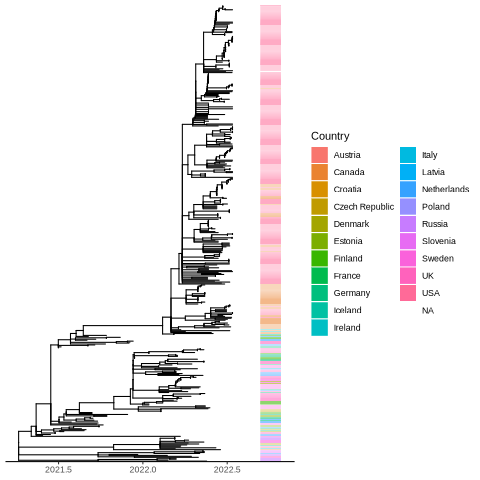

In [94]:
%%R

# Load libraries
library(ggtree)
library(ape)
library(dplyr)

library(ggnewscale)

# Load the tree and metadata
tree <- read.nexus("./timetree/timetree.nexus")
metadata <- read.csv("AIV_HA.country.csv")

# Rename 'name' column in metadata to 'label' to match tree tip labels
metadata <- metadata %>% rename(label = name)

# Create a tree plot
p <- ggtree(tree, mrsd="2022-07-14") +
theme_tree2()

# Convert metadata to a format suitable for gheatmap (rownames = tip labels)
rownames(metadata) <- metadata$label
metadata <- metadata %>% select(-label) # Remove label column since it's now rownames


# Create a heatmap with country information next to the tree

p_heatmap <- gheatmap(p, metadata %>% select(country), width = 0.1, offset=.1, colnames = FALSE, colnames_offset_y = .25, legend_title = "Country")

# Display the plot with heatmap

p_heatmap

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


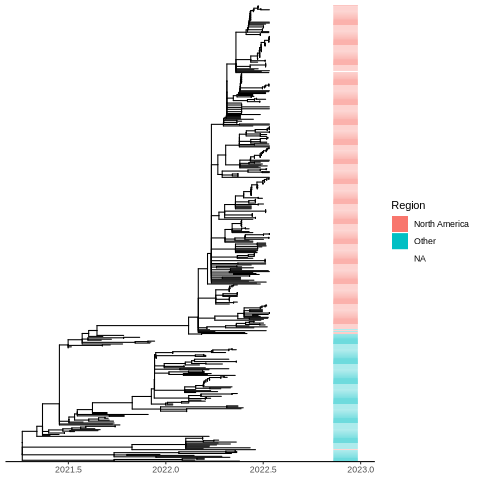

In [95]:
%%R
p_heatmap2 <- gheatmap(p, metadata %>% select(region), width = 0.1, offset=.265, colnames = FALSE, colnames_offset_y = .25, legend_title = "Region")

# Display the plot with heatmap

p_heatmap2


#### Tree visulisation

We can also use Auspice to interactively visualise the tree.

Load the time time and location metadata into https://auspice.us (use the timetree/auspice_tree.json file)

### Q: What is your estimate for the date and location of introduction of H5N1 into North America?